## Linear regression is a statistical approach for modelling relationship between a dependent variable with a given set of independent variables
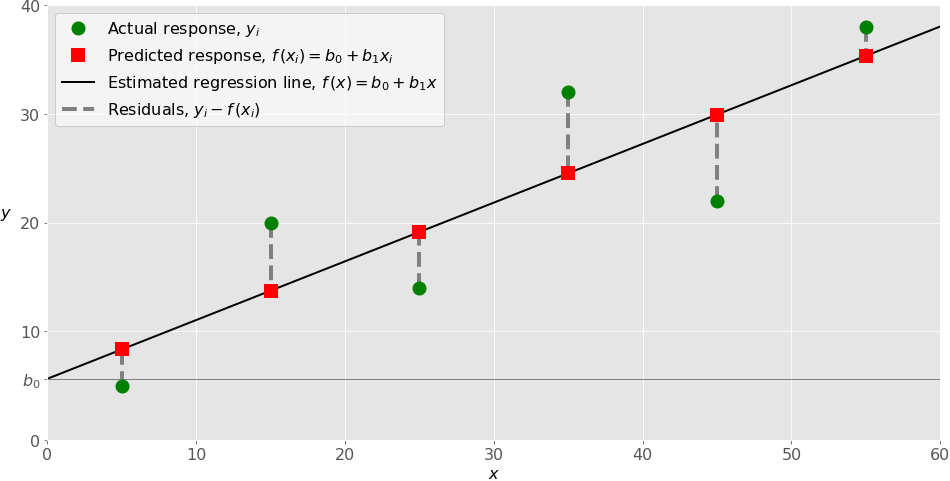

In [1]:
# IPython magic to plot interactively on the notebook
%matplotlib notebook

In [2]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
# Importing the dataset
sal = pd.read_excel('Salary.xlsx')
sal.head(2)
#sal.shape

,YearsExperience,Salary
0,1.1,10000
1,1.3,10500


In [4]:
X = sal.iloc[:, :-1].values # create matrix of features
y = sal.iloc[:, 1].values # create dependent variable vector

In [5]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 1/3, random_state = 0) # Change test size

In [6]:
 ## Feature Scaling not needed because the library used to build simple linear regressionc model will take care of that
"""from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)
sc_y = StandardScaler()
y_train = sc_y.fit_transform(y_train)"""

'from sklearn.preprocessing import StandardScaler\nsc_X = StandardScaler()\nX_train = sc_X.fit_transform(X_train)\nX_test = sc_X.transform(X_test)\nsc_y = StandardScaler()\ny_train = sc_y.fit_transform(y_train)'

In [7]:
 ## Fitting Simple Linear Regression to the Training Set
from sklearn.linear_model import LinearRegression
## Create object of Linear Regression class by calling it
reg = LinearRegression()

In [8]:
## Fit regressor object to training set by usinig the .fit method of the LinearRegression class
# Fitting Simple Linear Regression to the Training set
# We created a machine (simple linear regression model) and made it learn correlations on the training set so that the machine can predict salary based on its learning experience.
model = reg.fit(X_train,y_train)


In [9]:
## Predicting the Test set results
y_pred = reg.predict(X_test) # vector of predictions of dependent variable

In [10]:
(reg.intercept_,reg.coef_) 

(13311.00883470787, array([5361.78229353]))

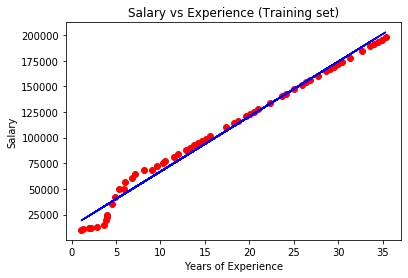

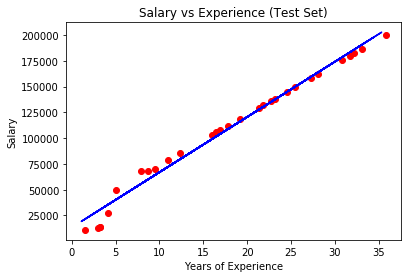

In [12]:
# Visualizing the Training set results
plt.scatter(X_train, y_train,color = 'red') # plot real values
plt.plot(X_train, reg.predict(X_train), color = 'blue') # plot regression line of predicted values on training set
plt.title('Salary vs Experience (Training set)')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.show()

# Visualizing the Test set results
plt.scatter(X_test, y_test, color = 'red') # plot real values of test set
plt.plot(X_train, reg.predict(X_train), color = 'blue') # plot predicted values of test set # Same regression line as above
plt.title('Salary vs Experience (Test Set)')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.show()

In [11]:
# Evaluate results
from sklearn import metrics

# Calculate metrics
print('MAE',metrics.mean_absolute_error(y_test, y_pred)) #MAE is the easiest to understand, because it's the average error
print('MSE',metrics.mean_squared_error(y_test, y_pred)) #MSE is more popular than MAE, because MSE "punishes" larger errors, which tends to be useful in the real world
print('RMSE',np.sqrt(metrics.mean_squared_error(y_test, y_pred))) #RMSE is even more popular than MSE, because RMSE is interpretable in the "y" units (target units)


MAE 5653.761026635242
MSE 55105733.870278984
RMSE 7423.3236404106065


In [12]:
##Calculated R Squared 
print('R^2 =',metrics.explained_variance_score(y_test,y_pred))

R^2 = 0.9829807213710279
